In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [2]:
os.chdir('/Users/ilyeshammouda/Desktop/Ilyes/2A ENSAE/stage/code_stage_2_A_ENSAE/Stage_2A_ENSAE/performances') 

In [14]:
# Convert xlsx files to Dataframes
#Change paths if needed 
per_Co_DataFrame = pd.read_excel('performance_log_ZORO_CO_Z.xlsx')
per_DLasso_DataFrame=pd.read_excel('performance_log_ZORO_DLasso.xlsx')
est_grad_Co_DataFrame=pd.read_excel('est_grad_norm_list_CO.xlsx')
est_grad_DLasso_DataFrame=pd.read_excel('est_grad_norm_list_DLasso.xlsx')


In [15]:
#Convert DataFrames to Numpy arrays
Performace_ZORO_CO_list=per_Co_DataFrame.values
Performace_ZORO_DLasso_list=per_DLasso_DataFrame.values
est_grad_Co_list=est_grad_Co_DataFrame.values
est_grad_DLasso_list=est_grad_DLasso_DataFrame.values

In [18]:
Performace_ZORO_CO_list.shape

(5001, 2)

In [50]:
#select the last elements of the list
Performace_ZORO_CO_last=np.array(Performace_ZORO_CO_list)[-2000:]
Performace_ZORO_DLasso_last=np.array(Performace_ZORO_DLasso_list)[-2000:]
est_grad_Co_list_last=np.array(est_grad_Co_list)[-2000:]
est_grad_DLasso_list_last=np.array(est_grad_DLasso_list)[-2000:]

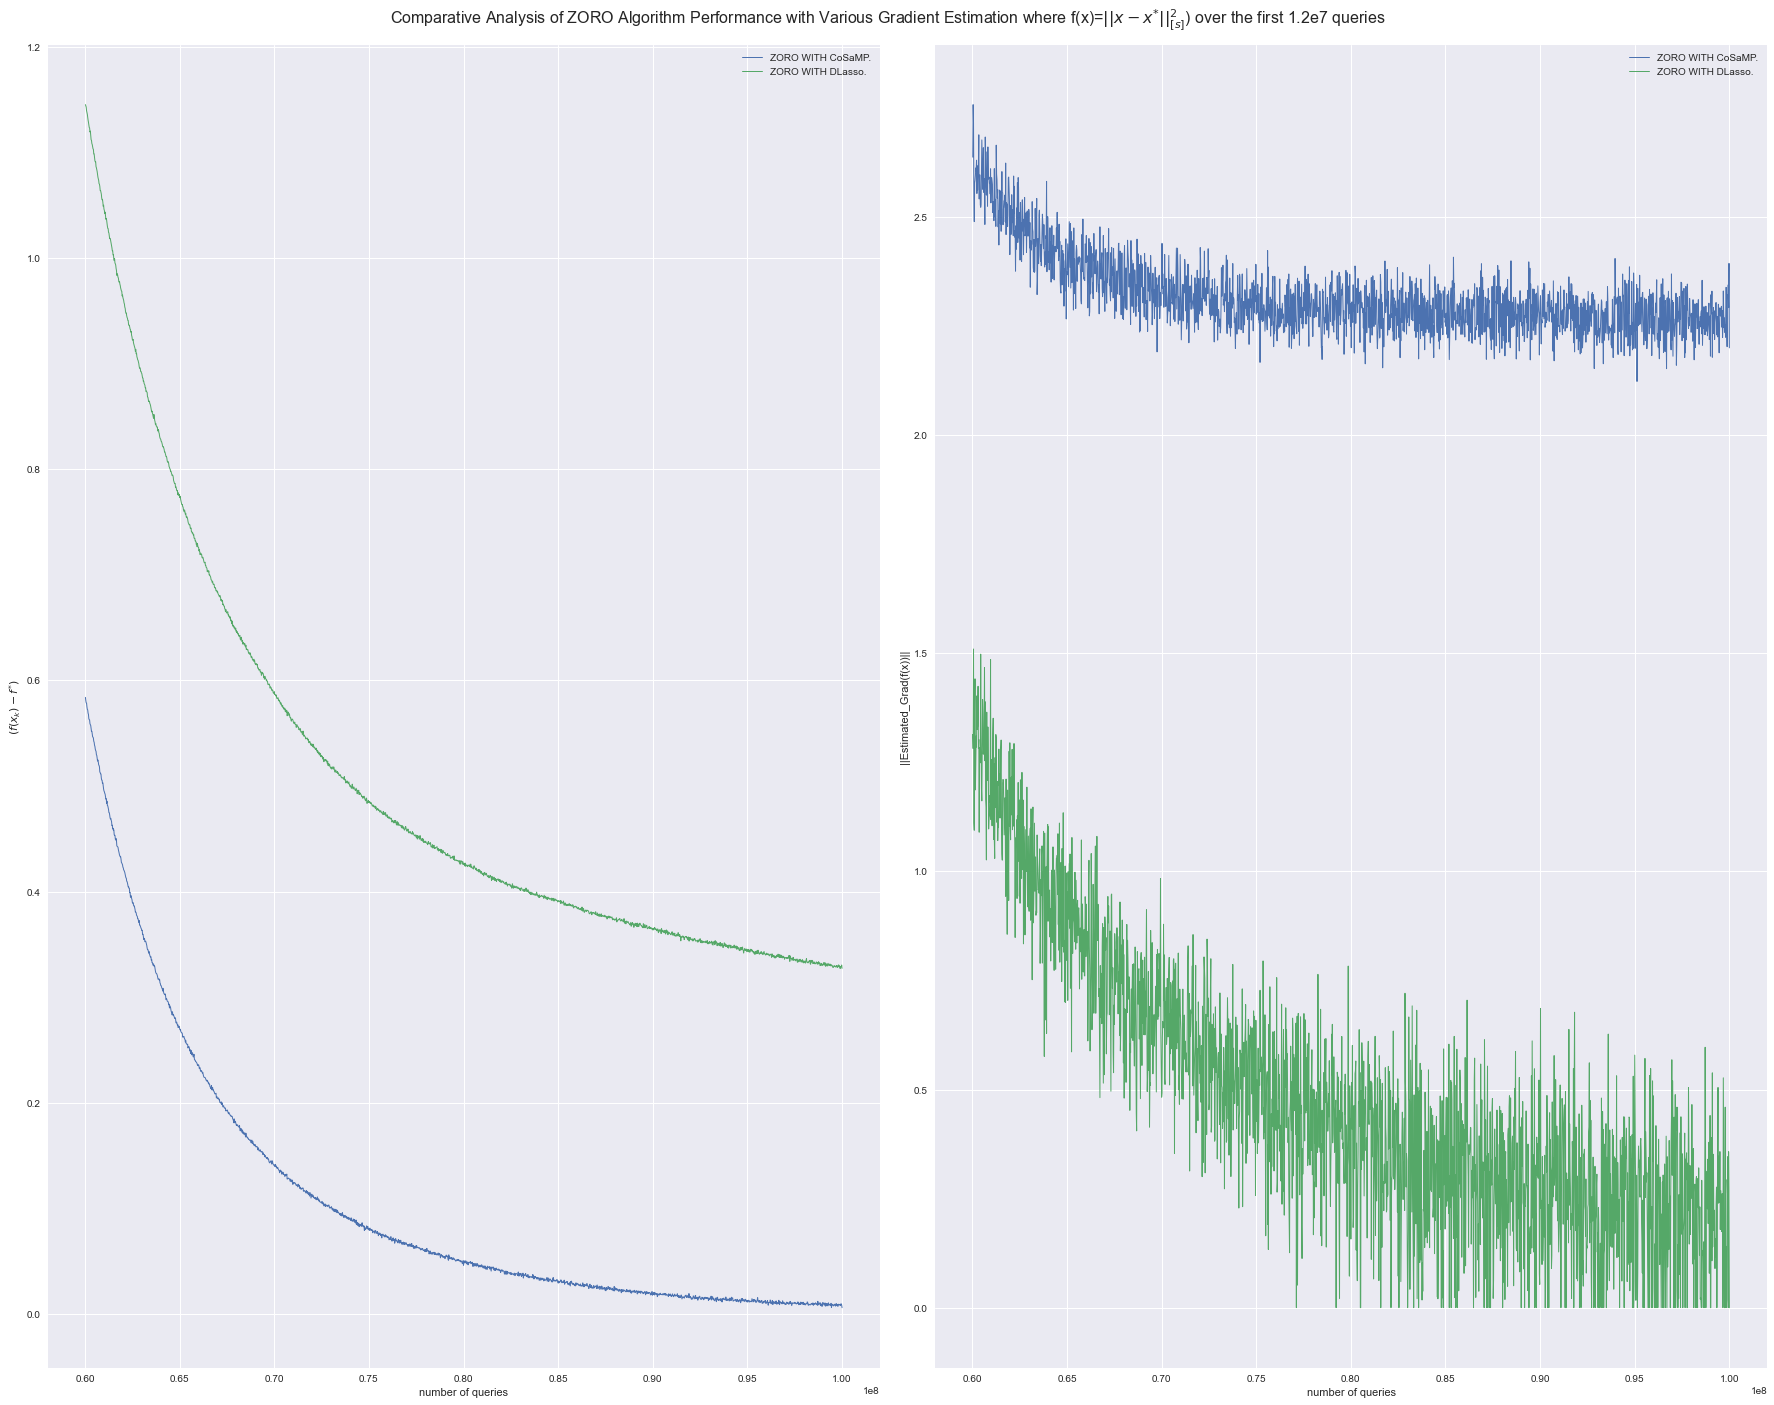

In [52]:
mpl.style.use('seaborn')

fig, axs = plt.subplots(1, 2, figsize=(25, 20))

ax1 = axs[0]
ax1.plot(np.array(Performace_ZORO_CO_last)[:,0],
 ((np.array(Performace_ZORO_CO_last)[:,1])), linewidth=1 ,label = "ZORO WITH CoSaMP.")

ax1.plot(np.array(Performace_ZORO_DLasso_last)[:,0],
 ((np.array(Performace_ZORO_DLasso_last)[:,1])), linewidth=1, label = "ZORO WITH DLasso.")

ax1.set_xlabel('number of queries')
ax1.set_ylabel('$(f(x_{k})-f^{*})$')
#ax1.set_title('COSAMP VS DLasso')
ax1.legend()



ax3 = axs[1]
ax3.plot(np.array(est_grad_Co_list_last)[:,0],
 ((np.array(est_grad_Co_list_last)[:,1])), linewidth=1, label = "ZORO WITH CoSaMP.")

ax3.plot(np.array(est_grad_DLasso_list_last)[:,0],
 ((np.array(est_grad_DLasso_list_last)[:,1])), linewidth=1, label = "ZORO WITH DLasso.")
ax3.set_xlabel('number of queries')
ax3.set_ylabel('||Estimated_Grad(f(x))||')
#ax3.set_title('COSAMP VS DLasso')
ax3.legend()



plt.suptitle("Comparative Analysis of ZORO Algorithm Performance with Various Gradient Estimation where f(x)=$||x-x^{*}||_{[s]}^{2}$) over the first 1.2e7 queries", fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()